<a href="https://colab.research.google.com/github/Aishwarya-C-001/PRODIGY_DS_01/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [23, 45, 36, 29, 52, 41, 34, 50, 28, 44],
    'Income': [45000, 52000, 60000, 48000, 75000, 62000, 40000, 80000, 30000, 70000],
    'Education': ['Bachelors', 'High School', 'Masters', 'Bachelors', 'PhD',
                  'Masters', 'High School', 'Bachelors', 'High School', 'PhD'],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Divorced',
                      'Married', 'Single', 'Married', 'Single', 'Married'],
    'Purchase': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

df.to_csv("Bank_marketing.csv", index=False)

print(df.head(5))


   CustomerID  Age  Income    Education Marital Status  Purchase
0           1   23   45000    Bachelors         Single         1
1           2   45   52000  High School        Married         0
2           3   36   60000      Masters        Married         1
3           4   29   48000    Bachelors         Single         0
4           5   52   75000          PhD       Divorced         1


Accuracy: 50.00%


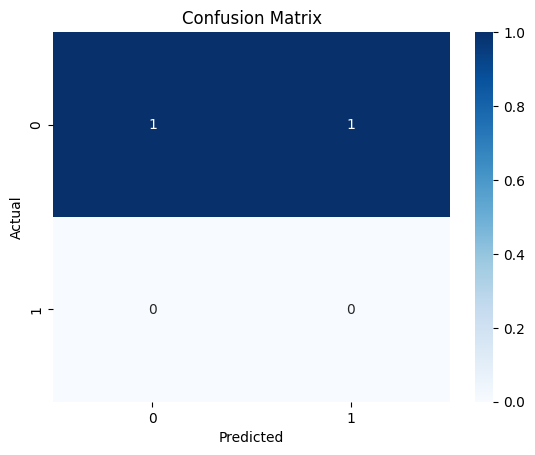

In [ ]:
Label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

X = df.drop(columns=['CustomerID', 'Purchase'])
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

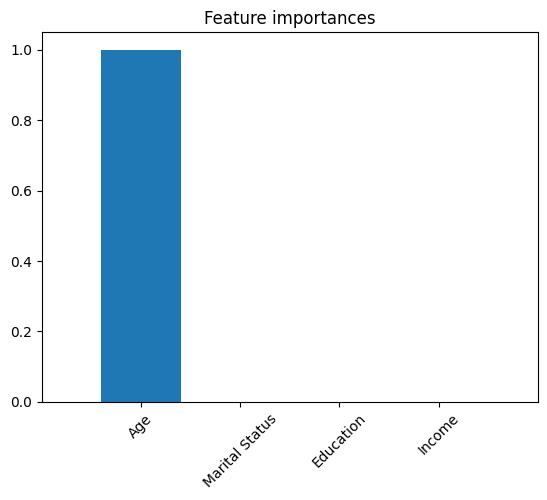

In [ ]:
import numpy as np
importance = clf.feature_importances_
features = X.columns
indices = np.argsort(importance)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


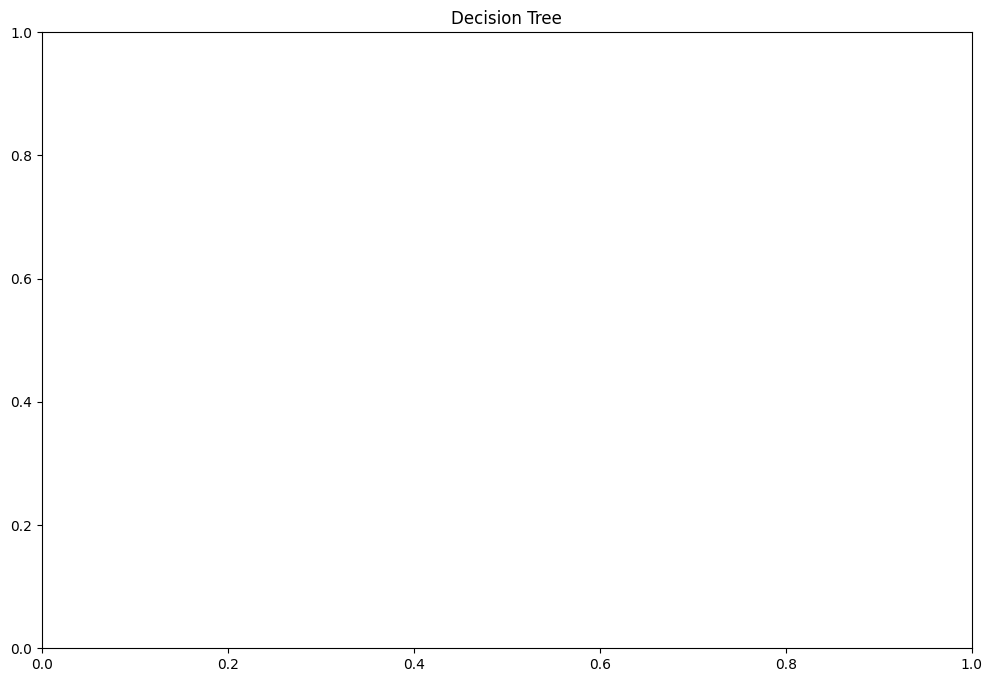

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title("Decision Tree")
plt.show()